In [2]:
import pandas as pd

# Read XPT file into a DataFrame
df = pd.read_sas("./demographic/demographic.xpt", format="xport")

# Display the first few rows
df

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHRGND,DMDHRAGZ,DMDHREDZ,DMDHRMAZ,DMDHSEDZ,WTINT2YR,WTMEC2YR,SDMVSTRA,SDMVPSU,INDFMPIR
0,130378.0,12.0,2.0,1.0,43.0,NaN,5.0,6.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,50055.450807,54374.463898,173.0,2.0,5.00
1,130379.0,12.0,2.0,1.0,66.0,NaN,3.0,3.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,29087.450605,34084.721548,173.0,2.0,5.00
2,130380.0,12.0,2.0,2.0,44.0,NaN,2.0,2.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,80062.674301,81196.277992,174.0,1.0,1.41
3,130381.0,12.0,2.0,2.0,5.0,NaN,5.0,7.0,1.0,71.0,...,2.0,2.0,2.0,3.0,NaN,38807.268902,55698.607106,182.0,2.0,1.53
4,130382.0,12.0,2.0,1.0,2.0,NaN,3.0,3.0,2.0,34.0,...,2.0,2.0,3.0,1.0,2.0,30607.519774,36434.146346,182.0,2.0,3.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11928,142306.0,12.0,2.0,1.0,9.0,NaN,2.0,2.0,1.0,111.0,...,1.0,3.0,3.0,3.0,NaN,11147.192563,13459.129019,176.0,1.0,2.01
11929,142307.0,12.0,2.0,2.0,49.0,NaN,4.0,4.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,69419.620456,64962.328962,181.0,1.0,NaN
11930,142308.0,12.0,2.0,1.0,50.0,NaN,2.0,2.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,32696.313477,44367.534132,183.0,2.0,1.95
11931,142309.0,12.0,2.0,1.0,40.0,NaN,2.0,2.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,30547.974564,46249.361849,176.0,1.0,3.11


In [1]:
df[df['RIDSTAR']==2]

NameError: name 'df' is not defined

In [ ]:
def get_variables():
    variables = ['', '']
    return variables 

In [11]:
import os
import pandas as pd

# Define the parent directory containing the four folders
parent_dir = "./"  # Change this if needed

# List of subfolders to process
folders = ["demographic", "examination", "laboratory", "questionnaire"]

# Dictionary to store merged DataFrames for each folder
merged_data = {}

# Iterate over each folder
for folder in folders:
    folder_path = os.path.join(parent_dir, folder)
    all_files = [f for f in os.listdir(folder_path) if f.endswith(".xpt")]

    df_list = []
    
    print(f"\nProcessing folder: {folder}\n" + "-"*50)

    # Read each XPT file and store in a list
    for file in all_files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_sas(file_path, format="xport")  # Read XPT file
        print(f"✅ Loaded {file} with {df.shape[0]} rows and columns: {list(df.columns)}")
        df_list.append(df)  # Store DataFrame

    # Merge all DataFrames in the folder on 'SEQN'
    if df_list:
        merged_df = df_list[0]  # Start with the first DataFrame
        
        for df in df_list[1:]:
            merged_df = merged_df.merge(df, on="SEQN", how="outer", suffixes=("", "_dup"))

        # Identify and drop duplicate columns (keeping the first occurrence)
        duplicate_cols = [col for col in merged_df.columns if col.endswith("_dup")]
        if duplicate_cols:
            print(f"\n🚨 Dropping duplicate columns: {duplicate_cols}")
            merged_df.drop(columns=duplicate_cols, inplace=True)

        # Store the cleaned merged DataFrame
        merged_data[folder] = merged_df

        # Print the first few rows of the merged DataFrame
        print(f"\n✅ Successfully merged {len(df_list)} files in {folder}")

mega_df = None
for folder, df in merged_data.items():
    if mega_df is None:
        mega_df = df  # Initialize with the first folder's data
    else:
        mega_df = mega_df.merge(df, on="SEQN", how="outer", suffixes=("", "_dup"))

# Drop any new duplicate columns
duplicate_cols = [col for col in mega_df.columns if col.endswith("_dup")]
if duplicate_cols:
    print(f"\n🚨 Dropping duplicate columns from mega file: {duplicate_cols}")
    mega_df.drop(columns=duplicate_cols, inplace=True)

# Save the final mega file
mega_file_path = "mega_file.csv"
mega_df.to_csv(mega_file_path, index=False)

print(f"\n✅ Final mega file saved as {mega_file_path} with {mega_df.shape[0]} rows and {mega_df.shape[1]} columns.")



Processing folder: demographic
--------------------------------------------------
✅ Loaded demographic.xpt with 11933 rows and columns: ['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDAGEMN', 'RIDRETH1', 'RIDRETH3', 'RIDEXMON', 'RIDEXAGM', 'DMQMILIZ', 'DMDBORN4', 'DMDYRUSR', 'DMDEDUC2', 'DMDMARTZ', 'RIDEXPRG', 'DMDHHSIZ', 'DMDHRGND', 'DMDHRAGZ', 'DMDHREDZ', 'DMDHRMAZ', 'DMDHSEDZ', 'WTINT2YR', 'WTMEC2YR', 'SDMVSTRA', 'SDMVPSU', 'INDFMPIR']

✅ Successfully merged 1 files in demographic

Processing folder: examination
--------------------------------------------------
✅ Loaded BMX_L.xpt with 8860 rows and columns: ['SEQN', 'BMDSTATS', 'BMXWT', 'BMIWT', 'BMXRECUM', 'BMIRECUM', 'BMXHEAD', 'BMIHEAD', 'BMXHT', 'BMIHT', 'BMXBMI', 'BMDBMIC', 'BMXLEG', 'BMILEG', 'BMXARML', 'BMIARML', 'BMXARMC', 'BMIARMC', 'BMXWAIST', 'BMIWAIST', 'BMXHIP', 'BMIHIP']
✅ Loaded BAX_L.xpt with 4771 rows and columns: ['SEQN', 'BAXMSTAT', 'BAXRXNC', 'BAXRXND', 'BAX5STAT', 'BAQ110', 'BAQ121', 'BAQ125', 'BA

In [4]:
df.columns

Index(['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDAGEMN',
       'RIDRETH1', 'RIDRETH3', 'RIDEXMON', 'RIDEXAGM',
       ...
       'MCQ550', 'MCQ560', 'MCQ220', 'MCQ230A', 'MCQ230B', 'MCQ230C',
       'MCQ230D', 'OSQ230', 'RXQ033', 'RXQ050'],
      dtype='object', length=534)

In [5]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from causallearn.search.ConstraintBased.PC import pc


df = pd.read_csv("NHANES.csv")  # Ensure the file path is correct
df = df[df['RIDSTATR']==2].reset_index(drop=True) # Leave only people both examined and interviewed


df 

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,MCQ550,MCQ560,MCQ220,MCQ230A,MCQ230B,MCQ230C,MCQ230D,OSQ230,RXQ033,RXQ050
0,130378.0,12.0,2.0,1.0,43.0,NaN,5.0,6.0,2.0,NaN,...,2.0,2.0,2.0,NaN,NaN,NaN,NaN,2.0,1.0,1.0
1,130379.0,12.0,2.0,1.0,66.0,NaN,3.0,3.0,2.0,NaN,...,2.0,2.0,1.0,30.0,NaN,NaN,NaN,1.0,1.0,1.0
2,130380.0,12.0,2.0,2.0,44.0,NaN,2.0,2.0,1.0,NaN,...,2.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0
3,130381.0,12.0,2.0,2.0,5.0,NaN,5.0,7.0,1.0,71.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
4,130382.0,12.0,2.0,1.0,2.0,NaN,3.0,3.0,2.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8855,142306.0,12.0,2.0,1.0,9.0,NaN,2.0,2.0,1.0,111.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
8856,142307.0,12.0,2.0,2.0,49.0,NaN,4.0,4.0,2.0,NaN,...,2.0,2.0,2.0,NaN,NaN,NaN,NaN,2.0,1.0,5.0
8857,142308.0,12.0,2.0,1.0,50.0,NaN,2.0,2.0,1.0,NaN,...,2.0,2.0,2.0,NaN,NaN,NaN,NaN,2.0,2.0,NaN
8858,142309.0,12.0,2.0,1.0,40.0,NaN,2.0,2.0,1.0,NaN,...,2.0,2.0,2.0,NaN,NaN,NaN,NaN,2.0,2.0,NaN


<!-- Replace missing with don't know -->
RIAGENDR -gender
RIDAGEYR - Age
DMDBORN4 - country of birth
DMDEDUC2 - education levels
DMDMARTZ - marital status
DMDHHSIZ - number of people in household
INDFMPIR - Ratio of family income to poverty
HUQ010 - General health condition

<!-- Diabetis -->

DIQ010 - diagnosis
DIQ160 - prediabietes was told


<!-- Lifestyle -->
DBQ930 - Main meal planner/preparer
DBQ940 - Main food shopper

FNQ510 - How often feel worried/nervous/anxious
FNQ520 - Level of feeling worried/nervous/anxious
FNQ530 - How often feel depressed
FNQ540 - Level of feeling depressed
HOD051 - Number of rooms in home
INDFMMPI - Family monthly poverty level index
INDFMMPC - Family monthly poverty level category
INQ300 - Family has savings more than $20,000
IND310 - Total savings/cash assets for the family

<!-- Blood work -->

Depth=9, working on node 20: 100%|██████████| 21/21 [00:00<00:00, 2556.54it/s]


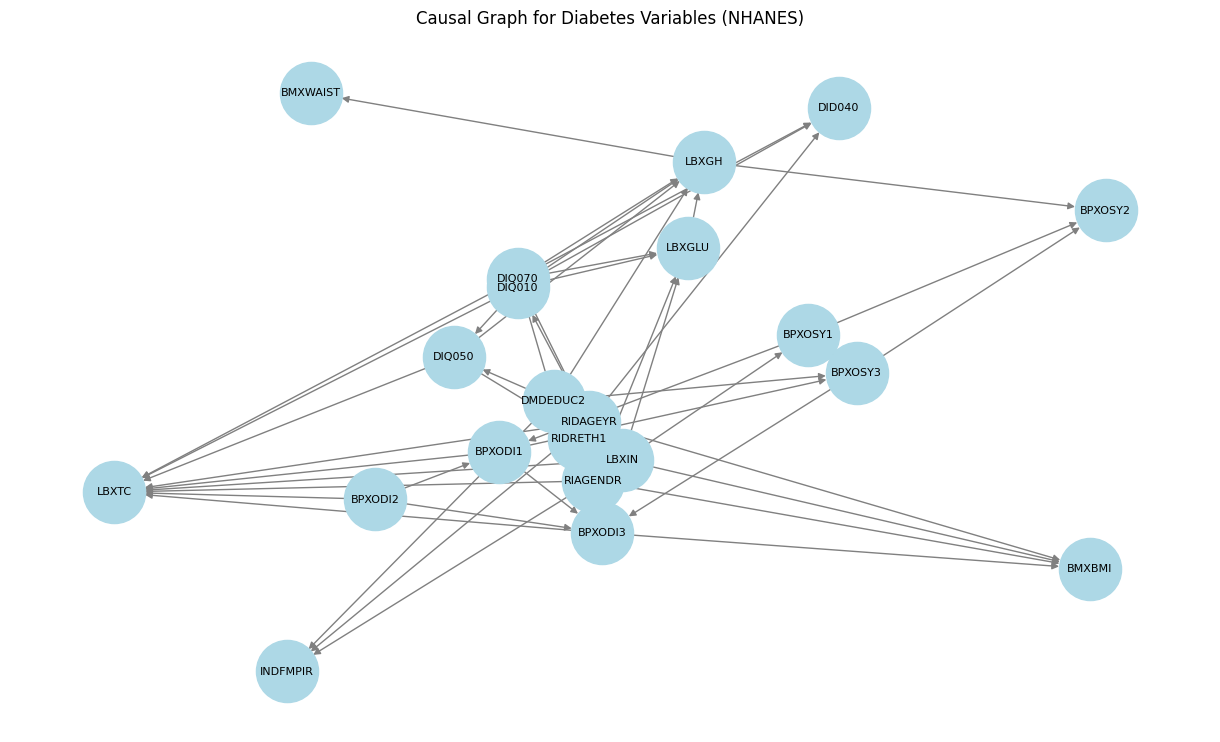

In [10]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from causallearn.search.ConstraintBased.PC import pc

# Step 1: Load NHANES dataset
df = pd.read_csv("NHANES.csv")  # Ensure the file path is correct


# Keep only the selected columns
df = df[diabetes_vars]

# Step 3: Handle missing values using median imputation
df.fillna(df.median(numeric_only=True), inplace=True)

# Step 4: Remove constant columns (if any) to avoid issues
df = df.loc[:, df.nunique() > 1]

# Step 5: Convert categorical data to numerical if needed
for col in df.select_dtypes(include=["object", "category"]).columns:
    df[col] = df[col].astype("category").cat.codes

# Step 6: Convert dataframe to numpy array
data = df.to_numpy()

# Step 7: Run PC algorithm with adjusted parameters
cg = pc(data, alpha=0.1, max_condition_set=2)

# Step 8: Convert PC output to NetworkX graph
G = nx.DiGraph()
for i in range(len(cg.G.nodes)):
    for j in range(len(cg.G.nodes)):
        if cg.G.graph[i, j] == 1:  # Edge exists
            G.add_edge(i, j)

# Step 9: Visualize the causal graph
node_labels = {i: col for i, col in enumerate(df.columns)}  # Map node numbers to column names
plt.figure(figsize=(12, 7))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, labels=node_labels, with_labels=True, node_size=2000,
        node_color="lightblue", edge_color="gray", font_size=8)
plt.title("Causal Graph for Diabetes Variables (NHANES)")
plt.show()



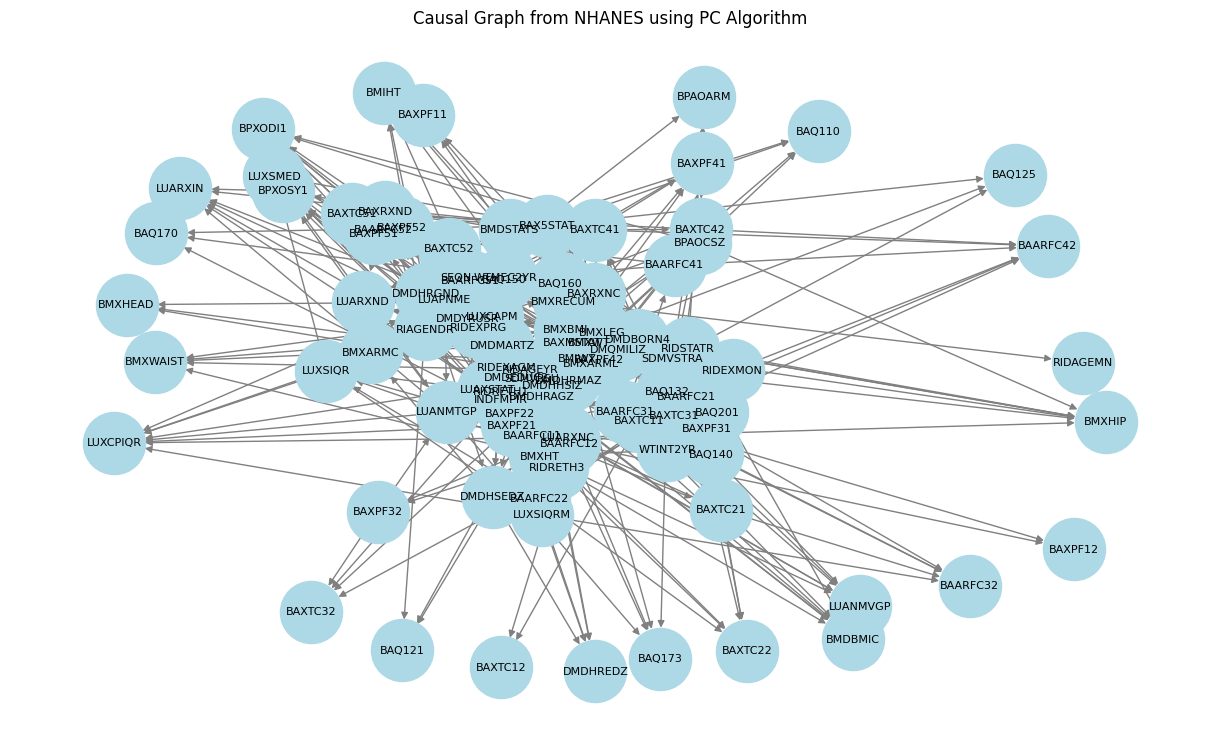

In [30]:
G = nx.DiGraph()

# Extract edges from the adjacency matrix representation
for i in range(len(cg.G.nodes)):
    for j in range(len(cg.G.nodes)):
        if cg.G.graph[i, j] == 1:  # Edge exists
            G.add_edge(i, j)
node_labels = {i: col for i, col in enumerate(df.columns)}
# Step 8: Visualize the causal graph
plt.figure(figsize=(12, 7))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, labels=node_labels, with_labels=True, node_size=2000,
        node_color="lightblue", edge_color="gray", font_size=8)
plt.title("Causal Graph from NHANES using PC Algorithm")
plt.show()